# Restricted Boltzmann Machine for dimensional reduction and reconstruction

## Importing the libraries

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train[:10000, :, :].reshape(10000, 28 * 28).astype(np.float32)
y_train = y_train[:10000]
X_test = X_test[:5000, :, :].reshape(5000, 28 * 28).astype(np.float32)
y_test = y_test[:5000]

In [4]:
X_train, X_test = X_train / 255., X_test / 255.

In [5]:
batch_size = 256

# Use tf.data API to shuffle and batch data.
# Prefetch batch (pre-load batch for faster consumption).
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.repeat().shuffle(10000).batch(batch_size).prefetch(1)

test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data = test_data.repeat().batch(batch_size).prefetch(1)

## Training the RBM

In [6]:
from restricted_boltzmann_machine_tf2 import RBM
rbm = RBM(n_visible=28*28, n_hidden=144)

In [7]:
rbm.fit(X_train, batch_size=batch_size, training_steps=30000)

Step 0, loss: 0.23097264766693115
Step 1000, loss: 0.04150049015879631
Step 2000, loss: 0.03317684680223465
Step 3000, loss: 0.029872149229049683
Step 4000, loss: 0.025236159563064575
Step 5000, loss: 0.025035912171006203
Step 6000, loss: 0.023338451981544495
Step 7000, loss: 0.02129875123500824
Step 8000, loss: 0.021650971844792366
Step 9000, loss: 0.02069888822734356
Step 10000, loss: 0.01931874081492424
Step 11000, loss: 0.01820371486246586
Step 12000, loss: 0.01930251717567444
Step 13000, loss: 0.018935056403279305
Step 14000, loss: 0.017841173335909843
Step 15000, loss: 0.017746729776263237
Step 16000, loss: 0.017552535980939865
Step 17000, loss: 0.016430260613560677
Step 18000, loss: 0.01665601134300232
Step 19000, loss: 0.016799118369817734
Step 20000, loss: 0.01597035489976406
Step 21000, loss: 0.016697263345122337
Step 22000, loss: 0.01660524308681488
Step 23000, loss: 0.015396904200315475
Step 24000, loss: 0.015215056017041206
Step 25000, loss: 0.0152562465518713
Step 26000, 

## Visualization of the result

Original Images


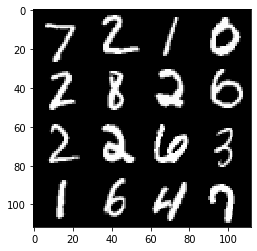

Reconstructed Images


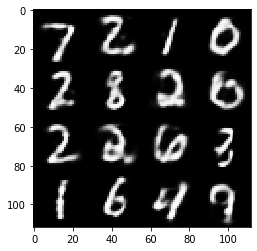

In [9]:
# Reduce dimension and reconstruct images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i, (batch_x, _) in enumerate(test_data.take(n)):
    # Encode and decode the digit image.
    visible = batch_x
    hidden_prob = rbm.probabilities_hidden(visible)
    hidden_state = rbm.sample(hidden_prob)
    reconstructed_images = rbm.probabilities_visible(hidden_state)
    # Display original images.
    for j in range(n):
        # Draw the generated digits.
        img = batch_x[j].numpy().reshape([28, 28])
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = img
    # Display reconstructed images.
    for j in range(n):
        # Draw the generated digits.
        reconstr_img = reconstructed_images[j].numpy().reshape([28, 28])
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = reconstr_img

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()